# Bayesian Linear Regression

In [1]:
import os, sys, re, random

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from time import time
import scipy as sp
import scipy.io as sio

plt.rcParams['figure.figsize'] = (16.0, 8.0)

## 1. Linear Regression

In [2]:
olympics = sio.loadmat('olympics.mat')

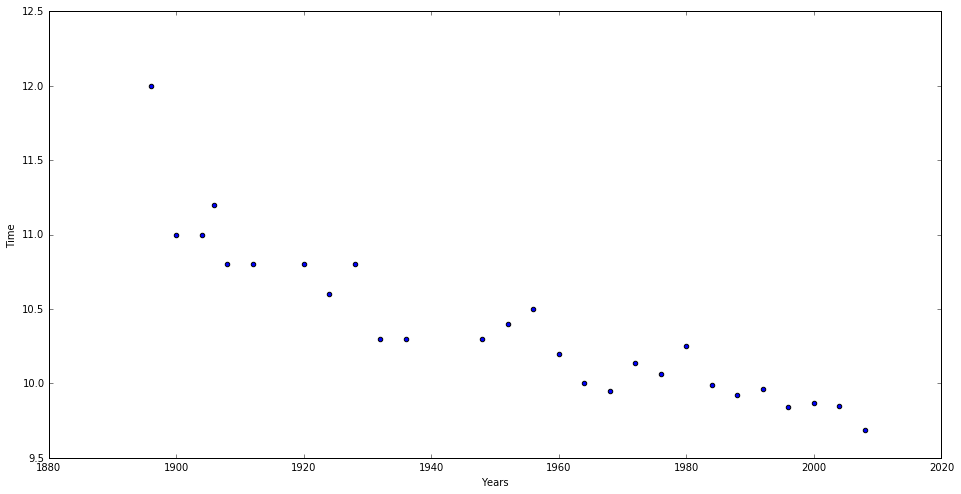

In [3]:
x = np.array(olympics['male100'][:,0])
y = np.array(olympics['male100'][:,1])
plt.scatter(x, y)
plt.xlabel('Years')
plt.ylabel('Time')
plt.show()

In [4]:
def lsfit(x, t):
    xmu = np.sum(x) / len(x)
    tmu = np.sum(t) / len(t)
    xt = np.array([x_i * t_i for x_i, t_i in zip(x, t)])
    xtmu = np.sum(xt) / len(xt)
    x2mu = np.sum(x**2) / len(x)
    w1 = (xtmu - xmu * tmu) / (x2mu - xmu**2)
    w0 = tmu - w1 * xmu
    return w0, w1

def avg_loss(x, t, w0, w1):
    return np.sum([(t[i] - w0 - w1*x[i])**2 for i in range(len(x))]) / len(x)

### 1.1. Men's 100 meters

w0: 36.4164559025 w1: -0.013330885711
Average loss: 0.0503071104757


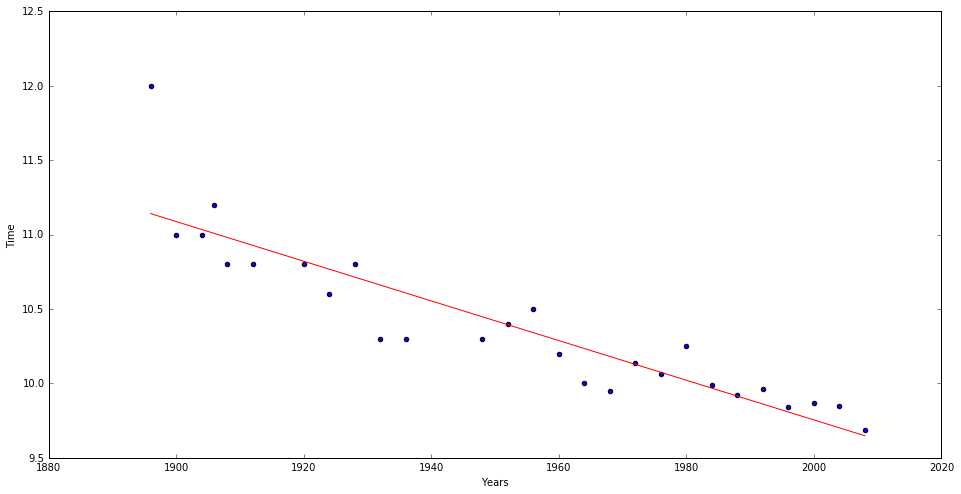

In [5]:
x_male100 = np.array(olympics['male100'][:,0])
y_male100 = np.array(olympics['male100'][:,1])

w0_male100, w1_male100 = lsfit(x_male100, y_male100)
fig, ax = plt.subplots()
points = ax.scatter(x_male100, y_male100)
line = ax.plot(x_male100, [w1_male100 * x_i + w0_male100 for x_i in x_male100], color='red')
ax.set_xlabel('Years')
ax.set_ylabel('Time')

print('w0:', w0_male100, 'w1:', w1_male100)
print('Average loss:', avg_loss(x_male100, y_male100, w0_male100, w1_male100))
plt.show()

### 1.2. Women's 100 meters

w0: 40.9241546006 w1: -0.0150718122373
Average loss: 0.0479427702254


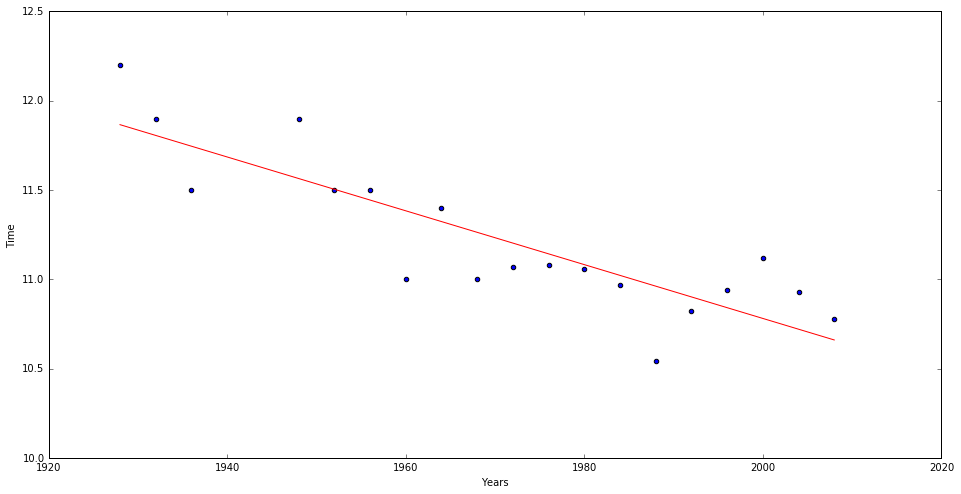

In [6]:
x_female100 = np.array(olympics['female100'][:,0])
y_female100 = np.array(olympics['female100'][:,1])

w0_female100, w1_female100 = lsfit(x_female100, y_female100)
fig, ax = plt.subplots()
points = ax.scatter(x_female100, y_female100)
line = ax.plot(x_female100, [w1_female100 * x_i + w0_female100 for x_i in x_female100], color='red')
ax.set_xlabel('Years')
ax.set_ylabel('Time')

print('w0:', w0_female100, 'w1:', w1_female100)
print('Average loss:', avg_loss(x_female100, y_female100, w0_female100, w1_female100))
plt.show()

### 1.3. Men vs Women's 100 meters

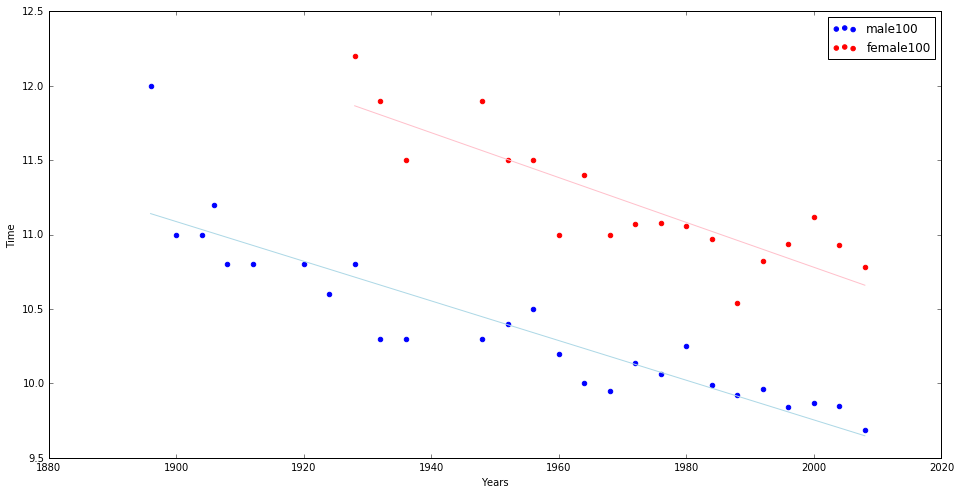

In [7]:
fig, ax = plt.subplots()

ax.scatter(x_male100, y_male100, color='blue', label='male100')
ax.scatter(x_female100, y_female100, color='red', label='female100')

ax.plot(x_male100, [w1_male100 * x_i + w0_male100 for x_i in x_male100], color='lightblue')
ax.plot(x_female100, [w1_female100 * x_i + w0_female100 for x_i in x_female100], color='pink')

ax.set_xlabel('Years')
ax.set_ylabel('Time')
ax.legend()

plt.show()

#### 1.3.1. Intersection

$$
w_{1_{male}}x - y = -w_{0_{male}}\\
w_{1_{female}}x - y = -w_{0_{female}}
$$

We use `numpy` to solve these linear equations by passing the coefficients to `solve` function:

In [8]:
x, y = np.linalg.solve([[w1_male100, -1], [w1_female100, -1]], [-w0_male100, -w0_female100])
print('Intersection at year %.2f with time %.2f' % (x, y))

Intersection at year 2589.25 with time 1.90


### 1.4. Loss minimization in vector form

In the lectures, we derived the following expression for the least squares solution in vector form:

$$
\hat w = (X^TX)^{-1}X^Tt \\
X = \begin{bmatrix}
       x_1^0 & x_1^1 \\
       x_2^0 & x_2^1 \\
       \vdots & \vdots \\
       x_N^0 & x_N^1
     \end{bmatrix}
$$

Our first step is to create X. This can be done in many ways. Perhaps the easiest is with the following command:

In [9]:
def get_design_matrix(x, k):
    return np.array([[x_i**n for n in range(k + 1)] for x_i in np.array(x).flat])

k = 2
X = get_design_matrix(x_male100, k) # second order
print(X)

[[  1.00000000e+00   1.89600000e+03   3.59481600e+06]
 [  1.00000000e+00   1.90000000e+03   3.61000000e+06]
 [  1.00000000e+00   1.90400000e+03   3.62521600e+06]
 [  1.00000000e+00   1.90600000e+03   3.63283600e+06]
 [  1.00000000e+00   1.90800000e+03   3.64046400e+06]
 [  1.00000000e+00   1.91200000e+03   3.65574400e+06]
 [  1.00000000e+00   1.92000000e+03   3.68640000e+06]
 [  1.00000000e+00   1.92400000e+03   3.70177600e+06]
 [  1.00000000e+00   1.92800000e+03   3.71718400e+06]
 [  1.00000000e+00   1.93200000e+03   3.73262400e+06]
 [  1.00000000e+00   1.93600000e+03   3.74809600e+06]
 [  1.00000000e+00   1.94800000e+03   3.79470400e+06]
 [  1.00000000e+00   1.95200000e+03   3.81030400e+06]
 [  1.00000000e+00   1.95600000e+03   3.82593600e+06]
 [  1.00000000e+00   1.96000000e+03   3.84160000e+06]
 [  1.00000000e+00   1.96400000e+03   3.85729600e+06]
 [  1.00000000e+00   1.96800000e+03   3.87302400e+06]
 [  1.00000000e+00   1.97200000e+03   3.88878400e+06]
 [  1.00000000e+00   1.97600

Given X, we can easily compute Equation 1 with the following command:

In [10]:
def get_w_hat(X, t):
    return np.dot(np.linalg.inv(X.T.dot(X)), X.T.dot(t))

t = np.array(y_male100)
w_hat = get_w_hat(X, t)
print(w_hat)

[  4.55597856e+02  -4.43160486e-01   1.10151552e-04]


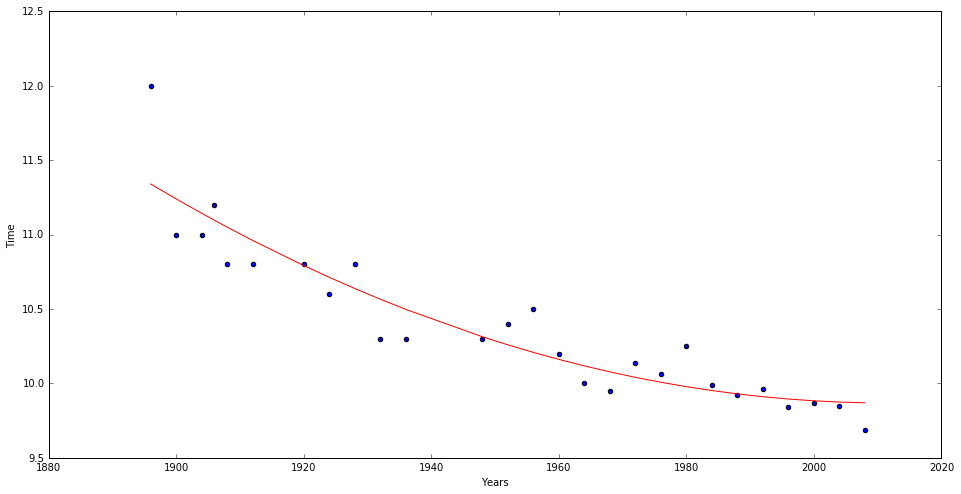

In [11]:
fig, ax = plt.subplots()
men_points = ax.scatter(x_male100, y_male100)
men_fit = ax.plot(x_male100, X.dot(w_hat), color='red')

ax.set_xlabel('Years')
ax.set_ylabel('Time')

plt.show()

To make predictions, at a column vector of test points, `x_test`, we need to create `X_test` and then multply it by `w_hat`. For example:

In [12]:
x_test = np.arange(2012, 2016)
X_test = get_design_matrix(x_test, k)
predictions = X_test.dot(w_hat) # returns a column vector
print('Predictions:', predictions.T)

Predictions: [ 9.86830317  9.86850269  9.8689225   9.86956262]


In [13]:
def get_predictions(x, t, x_test, k = 0):
    X = get_design_matrix(x, k)
    X_test = get_design_matrix(x_test, k)
    w_hat = get_w_hat(X, t)
    return X_test.dot(w_hat)

We may find it interesting to test your code with different datasets. The following code will generate data from a third order polynomial:

In [14]:
x = np.random.rand(1, 50)
x.sort()
x_test = np.random.rand(1, 200)
x_test.sort()
noise = 0.5
t = np.array(5 * x**3 - x**2 + x + np.random.rand(1, 50) * noise).T
tt = np.array(5 * x_test**3 - x_test**2 + x_test + np.random.rand(1, 200) * noise).T

k = 2

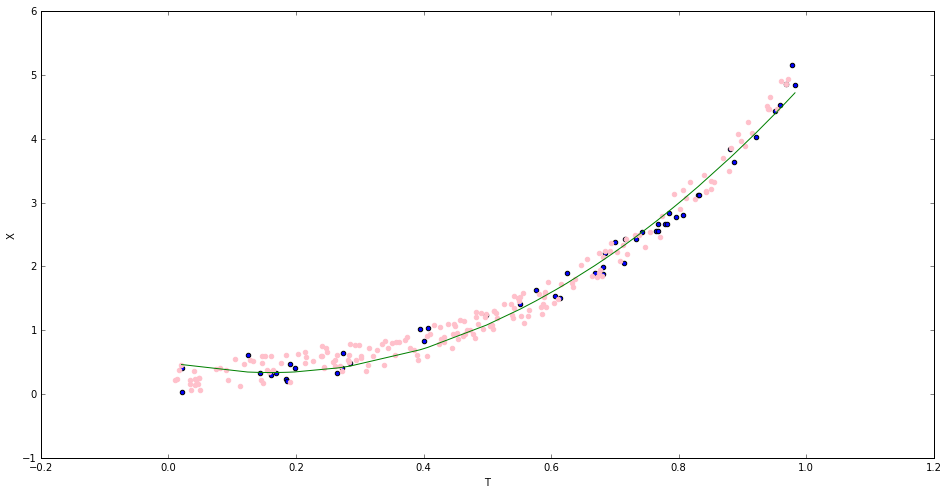

In [15]:
fig, ax = plt.subplots()
points = ax.scatter(x, t)
points_test = ax.scatter(x_test, tt, color='pink')
X = get_design_matrix(x, k)
w_hat = get_w_hat(X, t)
fit = ax.plot(x.T, X.dot(w_hat), color='green')

ax.set_xlabel('T')
ax.set_ylabel('X')

plt.show()

You can compute the loss on the test data using:

In [16]:
di = (get_predictions(x, t, x_test, k) - tt)**2;
mean_err = di.mean()
print('Mean error', mean_err)

Mean error 0.031804680491


### 1.5. Cross-validation

Mean error: 2.86
Mean error from cross-validation: 0.05


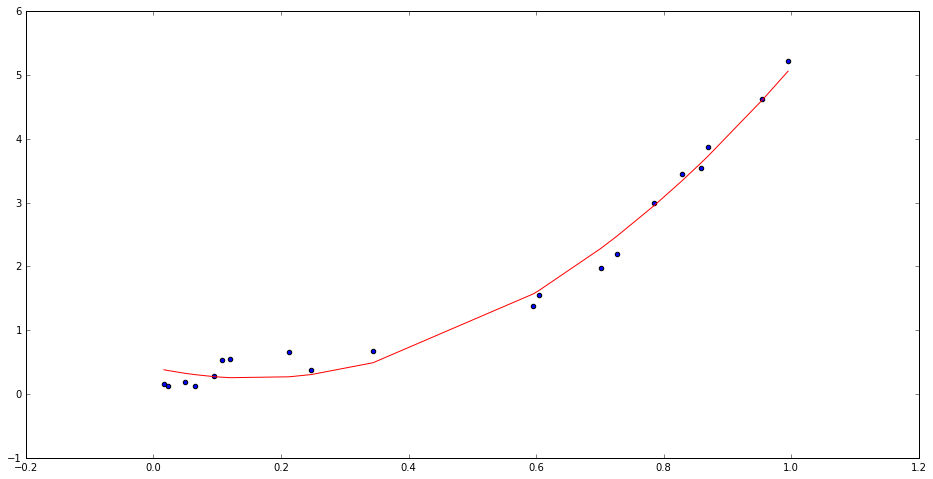

In [17]:
def cross_validation(x, t, k = 0):
    err = np.zeros(x.size)
    for i in range(x.size):
        train_x = np.delete(x, i)
        train_t = np.delete(t, i)
        test_x = np.take(x, i)
        test_t = np.take(t, i)
        pred = get_predictions(train_x, train_t, test_x, k)
        err[i] = ((pred - test_t) ** 2).mean()

    mean_err = err.mean()
    return mean_err

k = 2
noise = 0.5
x = np.random.rand(20)
x.sort()

t = np.array(5 * x**3 - x**2 + x + np.random.rand(20) * noise).T
di = (get_predictions(x, t, x_test, k) - tt)**2;
mean_err = di.mean()
print('Mean error: %.2f' % mean_err)
mean_err = cross_validation(x, t, k)
print('Mean error from cross-validation: %.2f' % mean_err)

X = get_design_matrix(x, k)
w_hat = get_w_hat(X, t)

fig, ax = plt.subplots()
points = ax.scatter(x, t)

fit = ax.plot(x, X.dot(w_hat), color='red')

plt.show()

Plot the average error for different polynomial orders. Does your code predict the correct one?

[ 2.91182245  0.36177997  0.05327345  0.02815028  0.01926153  0.0233826
  0.03313034  0.06342078  0.13057765  0.12723951]


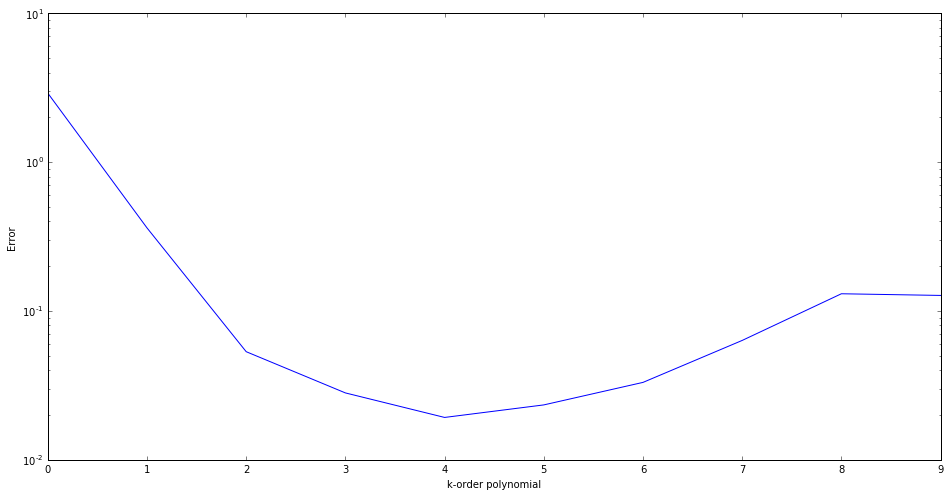

In [18]:
orders = np.arange(10)
avg_err = np.zeros(10)
for k in orders:
    avg_err[k] = cross_validation(x, t, k)

print(avg_err)

plt.figure()
plt.plot(orders, avg_err)
plt.xlabel('k-order polynomial')
plt.ylabel('Error')
plt.yscale('log')
plt.show()

## 2. Bayesian Linear Regression

We want to look at the effect of increasing the polynomial order above 4, we'll need to rescale the $x$ (Olympic year) values (do this before you calculate all the $x^k$ stuff).

In [19]:
# Load men's olympic data
x = np.array(olympics['male100'][:,0])
t = np.array(olympics['male100'][:,1])

min_val = x.min() # First Olympic year
x = x - min_val   # Subtract the first year
x = x / 4         # Olympics are every four years

test_x = (np.array(2012) - min_val) / 4

### 2.1. Maximum likelihood

Using the maximum likelihood estimators, we compute $\hat w$ and $\hat\sigma^2$ on the Olympic data for polynomials of first, second and third order.

\begin{align}
t &= w_0 + w_1 x \\
t &= w_0 + w_1 x + w_2 x^2 \\
t &= w_0 + w_1 x + w_2 x^2 + w_3 x^3
\end{align}

We first declare a function to compute $\hat\sigma^2$, the variance, which is defined as:

\begin{equation}
\hat\sigma^2 = \frac{1}{N}(\mathbf{t} - \mathbf{X\hat{w}})^T(\mathbf{t} - \mathbf{X\hat{w}})
\end{equation}

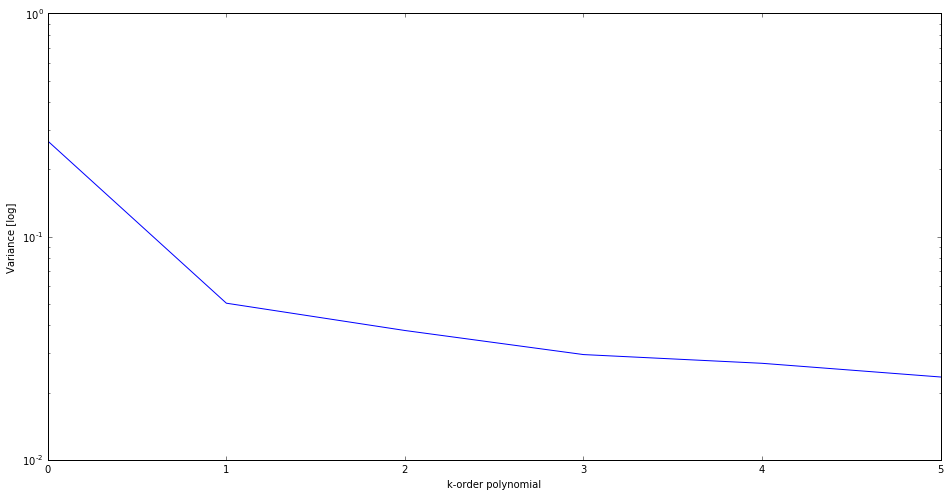

In [20]:
def get_variance(X, t, w_hat):
    A = t - X.dot(w_hat)
    return A.T.dot(A / t.size)

K = 6
s_q = np.zeros(K)
for k in np.arange(K):
    X = get_design_matrix(x, k)
    w_hat = get_w_hat(X, t)
    s_q[k] = get_variance(X, t.T, w_hat).mean()

plt.figure()
plt.plot(np.arange(K), s_q)
plt.xlabel('k-order polynomial')
plt.ylabel('Variance [log]')
plt.yscale('log')
plt.show()

We perform a LOO CV analysis for maximum likelihood for polynomials of order `0` to `8`:

[ 0.28911154  0.06243185  0.05659436  0.05295194  0.06097492  0.0641232
  0.0789008   0.07819293  0.09349436]


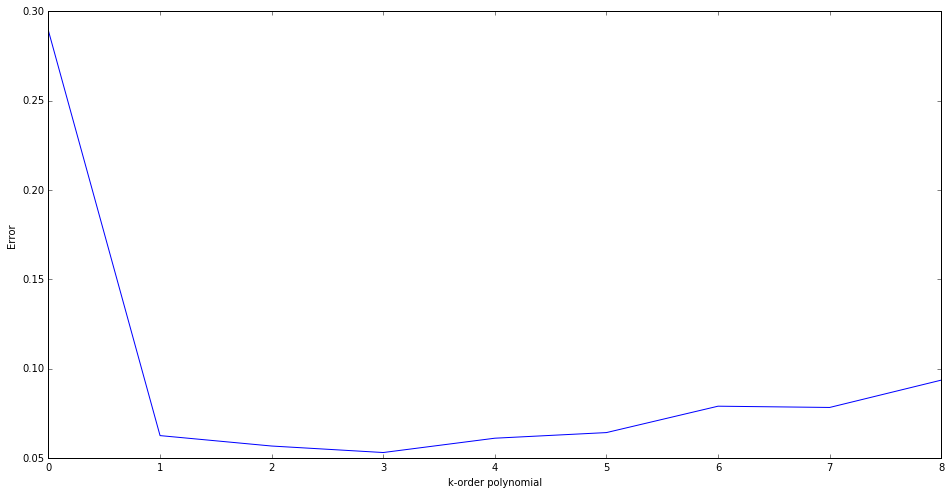

In [21]:
K = 9
orders = np.arange(K)
avg_err = np.zeros(K)
for k in orders:
    avg_err[k] = cross_validation(x, t, k)

print(avg_err)

plt.figure()
plt.plot(orders, avg_err)
plt.xlabel('k-order polynomial')
plt.ylabel('Error')
plt.show()

## 2.2. Uncertainty in estimates

For the first order polynomial, we compute $\mathrm{cov}\{\hat w\}$ using $\hat\sigma^2$ in place of $\sigma^2$.

\begin{equation}
    \mathrm{cov}\{\hat w\} = \sigma^2 \left(\mathbf{X}^T \mathbf{X}\right)^{-1}
\end{equation}

In [22]:
# Load men's olympic data
x = np.array(olympics['male100'][:,0])
t = np.array(olympics['male100'][:,1])

min_val = x.min() # First Olympic year
x = x - min_val   # Subtract the first year
x = x / 4         # Olympics are every four years

In [37]:
def get_covariance(X, variance):
    return variance * np.linalg.inv(X.T.dot(X))

X = get_design_matrix(x, 1)
w_hat = get_w_hat(X, t)
ss = get_variance(X, t.T, w_hat).mean()
cov = get_covariance(X, ss)
print('Covariance:\n', cov)

Covariance:
 [[ 806.56277261   -2.36552444]
 [  -2.36552444   99.3232368 ]]


In [40]:
import numpy.matlib as npml

def gausssamp(mu, sigma, N, sigmachol=None):
    if sigmachol is None:
        sigmachol = np.linalg.cholesky(sigma).T
    q = np.random.rand(mu.size, N)
    g = npml.repmat(np.atleast_2d(mu).T, 1, N) + sigmachol.dot(q)
    return g.T

co_w = ss * np.linalg.inv(X.T.dot(X))
samps = gausssamp(w_hat, co_w, 10).T

plt.figure()
for i in np.arange(10):
    plt.plot(x, X.dot(samps[:,i]))
plt.scatter(x, t)
plt.show()

ValueError: operands could not be broadcast together with shapes (1,20) (2,10) 

## 2.3. Uncertainty in predictions

We load `synthentic_data.mat` which contains the variables `x`, `t`, `testx`.

In [25]:
synthentic_data = sio.loadmat('synthetic_data.mat')

In [26]:
x = np.array(synthentic_data['x'])
t = np.array(synthentic_data['t'])
test_x = np.array(synthentic_data['testx'])

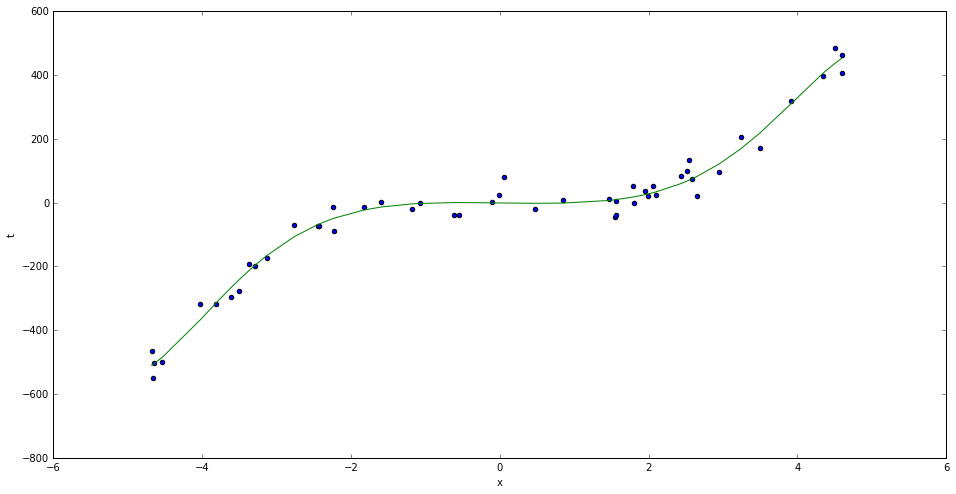

In [27]:
order = 7
X = get_design_matrix(x, order)
w_hat = get_w_hat(X, t)
ss = get_variance(X, t.T, w_hat).mean()

fig, ax = plt.subplots()
points = ax.scatter(x, t)
fit = ax.plot(x, X.dot(w_hat), color='green')

ax.set_xlabel('x')
ax.set_ylabel('t')

plt.show()

In [28]:
def get_variance_test(X_test, X, variance):
    cov = get_covariance(X, variance)
    for i, x_new in enumerate(X_test):
        ss_new[i] = x_new.dot(cov).dot(x_new).mean()
    return ss_new

In [29]:
t_new = get_predictions(x, t, test_x, order)
X_new = get_design_matrix(test_x, order)

ss_new = get_variance_test(X_new, X, ss)

NameError: name 'ss_new' is not defined

Predictive means are called `t_new`, variances `v_new`. Both are vectors of the same size (and orientation!)

In [ ]:
fig, ax = plt.subplots()
points = ax.scatter(x, t)
err = ax.errorbar(test_x, t_new, yerr=ss_new, color='#ff8888')

ax.set_xlabel('x')
ax.set_ylabel('t')

plt.show()

TODO: What do you notice – is it what you expect?

We now repeat this experiment for `synthetic_data_2.mat`.

In [ ]:
synthentic_data_2 = sio.loadmat('synthetic_data_2.mat')

In [ ]:
x = np.array(synthentic_data_2['x'])
t = np.array(synthentic_data_2['t'])
test_x = np.array(synthentic_data_2['testx'])

In [ ]:
order = 7
X = get_design_matrix(x, order)
w_hat = get_w_hat(X, t)
ss = get_variance(X, t.T, w_hat).mean()

t_new = get_predictions(x, t, test_x, order)
X_new = get_design_matrix(test_x, order)

ss_new = get_variance_test(X_new, X, ss)
    
fig, ax = plt.subplots()
points = ax.scatter(x, t)
err = ax.errorbar(test_x, t_new, yerr=ss_new, color='#ff8888')

ax.set_xlabel('x')
ax.set_ylabel('t')

plt.show()

TODO: What do you notice?

## 3. Bayesian inference for a coin tossing experiment

### 3.1. Computing posteriors

The beta probability density function is defined as:

\begin{equation}
p(r|\alpha,\beta) = \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha)\Gamma(\beta)} r^{\alpha - 1}(1 - r)^{\beta - 1}
\end{equation}

where $0 \leq r \leq 1$ and $\alpha, \beta > 0$.

Posterior, which we aim to find is:

\begin{equation}
p(r | y_N, \alpha, \beta) \propto r^{\gamma - 1}(1 - r)^{\delta - 1}
\end{equation}

In [ ]:
import scipy.stats as spstats
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (16.0, 8.0)

In [ ]:
class Coin:
    def __init__(self):
        self.__r = np.random.uniform(0, 1)
    def __call__(self, N):
        return np.sum([i <= self.r for i in np.random.rand(N, 1)])
    @property
    def r(self):
        return self.__r

In [ ]:
def plot_beta(alpha, beta, ax = None):
    x = np.arange(0, 1.01, 0.01)
    if ax is None:
        fig, ax = plt.subplots()
    ax.plot(x, spstats.beta.pdf(x, alpha, beta))
    return ax
    
def fairground():
    return sum([i < 0.8 for i in np.random.rand(10, 1)]) <= 6

plot_beta(2, 2)
plt.show()

In [ ]:
N = 10000
coin = Coin()
yN = coin(N)
alpha1 = 2
beta1 = 2
alpha2 = 1
beta2 = 2
gamma1 = yN + alpha1
delta1 = beta1 + N + yN
gamma2 = yN + alpha2
delta2 = beta2 + N + yN

fig, ax = plt.subplots()
plot_beta(alpha1, beta1, ax)
plot_beta(gamma1, delta1, ax)
plt.show()

In [ ]:
print('The coin bias was', coin.r)

In [ ]:
from scipy.misc import comb

n_look = 50
coin1 = Coin()
y_n = coin1(n_look)
alpha1 = 2
beta1 = 2
gamma1 = y_n + alpha1
delta1 = beta1 + n_look - y_n

N = 10
p_ynew_se_six = 0

for ynew in np.arange(6):
    b = comb(N, ynew)
    num = np.random.gamma(gamma1 + delta1) * np.random.gamma(gamma1 + ynew) * np.random.gamma(delta1 + N - ynew)
    den = np.random.gamma(gamma1) * np.random.gamma(delta1) * np.random.gamma(gamma1 + delta1 + N)
    p_ynew_se_six += (b * num) / den

print('The coin bias was', coin1.r)
print(p_ynew_se_six)